# What Factors Could Affect A Loan Outcome Status?

## Investigation Overview

In this investigation, we are going to explore some features selected from the many features present in the Prosper loan dataset and we are going to investigate their effect on loan outcome status. Main features of interest are the interest rate, the annual percentage rate, the loan amount, the monthly loan payment, and prosper rating. other features such as homeownership, employment status with duration, number of recommendations, and verifiable incomes are also included.

## Dataset Overview

In our dataset we are provided with the outcome of little more than 100,000 loans. This dataset is our wrangled version of the original dataset and contains only our selected features of interest. Furthur cleaning was performed in order to remove duplicates, missing values, and make the data more consistent for analysis. Selected features include: the interest rate, the annual percentage rate, the loan amount, the monthly loan payment, prosper rating, the loan term, and many others.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
%matplotlib inline

In [2]:
loan_df = pd.read_csv('prosper_loan_sub.csv',parse_dates=['listing_creation_date'])

In [3]:
# converting categorical variables to categorical types
cat_var_dict = {'loan_status': ['Completed','Past Due','Defaulted','Chargedoff'],
                'prosper_rating': ['AA','A','B','C','D','E','HR'],
                'employment_status':['Self-employed','Employed','Full-time','Part-time','Not employed','Retired'],
                'listing_category': ['Debt Consolidation','Home Improvement','Business','Auto','Personal Loan','Household Expenses','Medical/Dental']
               }

for v in cat_var_dict:
    cat_var = pd.api.types.CategoricalDtype(ordered = True, categories = cat_var_dict[v])
    loan_df[v] = loan_df[v].astype(cat_var)

# The Loan Outcome Status

Our main goal is to compare what factors are more likely to result in a completed loan and what will result in a non-completed loan (this includes: past due, defaulted, or chargedoff).

# The different loan outcomes

The following bar chart will show us the counts of data points represented by each outcome.  we can see that in overall, completed loans is the most frequent outcome, more frequent than Past Due, Defaulted, and Chargedoff combined together 

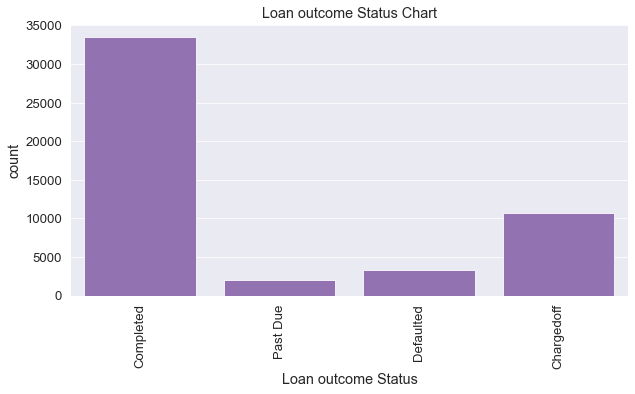

In [4]:
# plotting a bar chart for loan_status
plt.figure(figsize=(10,5))
color = sns.color_palette()[4]
sns.countplot(data=loan_df, x='loan_status',color=sns.color_palette()[4])
plt.xticks(rotation=90)
plt.title('Loan outcome Status Chart')
plt.xlabel('Loan outcome Status');

# The most common prosper rating

Prosper ratings provides an estimation of how risky a loan is. Prosper Ratings from lowest-risk to highest-risk are labeled: AA, A, B, C, D, E, and HR ("High Risk"). The most common prosper rating is C. Which we can describe as neutral-risk being in the middle between AA or low-risk and HR or high-risk.

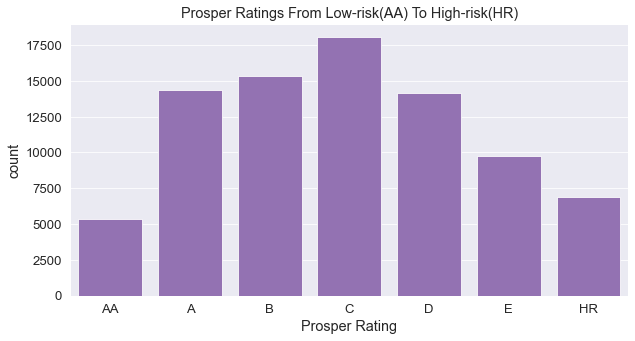

In [5]:
# plotting a bar chart for prosper_rating
plt.figure(figsize=(10,5))
color = sns.color_palette()[4]
rating_order = ['AA','A','B','C','D','E','HR']
sns.countplot(data=loan_df, x='prosper_rating',color=sns.color_palette()[4], order=rating_order)
plt.title('Prosper Ratings From Low-risk(AA) To High-risk(HR)')
plt.xlabel('Prosper Rating');

# Distribution of Interest Rates

The distribution of interest rates follows approximately a normal distribution. The majority of interest rates lie in the area between 15 - 20 percent. The number of interest rates above 20 percent tend to decrease. There is a spike in the number of interest rates at about 32 percent after which number of high interest rates continue decreasing again.

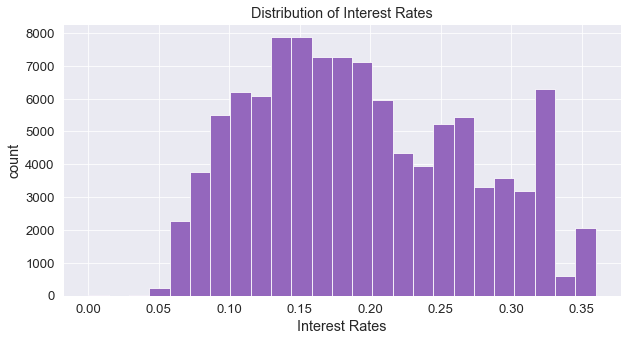

In [6]:
plt.figure(figsize=(10,5))
plt.hist(data=loan_df, x="borrower_rate",color=sns.color_palette()[4],bins=25)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rates')
plt.ylabel('count');

# Distribution of Loan Amounts

The distribution of loan original amount is right-skewed multimodal. Most loan amounts fall below 10000. From the histogram  we can see that the number of loans higher than 5000 tend to decrease until it we reach about 10000 we have a spike then the number of loans continue decreasing again until another spike at 15000 and so on at each multiple of five thousand.

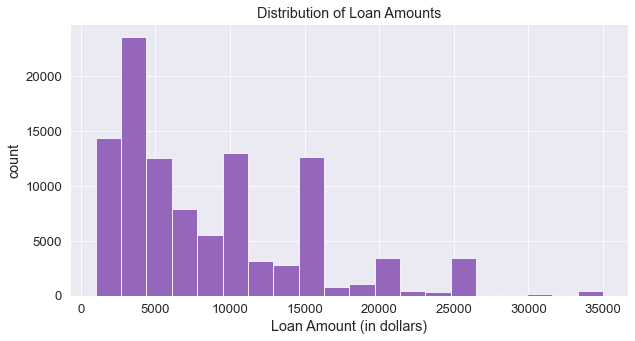

In [7]:
plt.figure(figsize=(10,5))
plt.hist(data=loan_df, x="loan_original_amount",color=sns.color_palette()[4],bins=20)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount (in dollars)')
plt.ylabel('count');

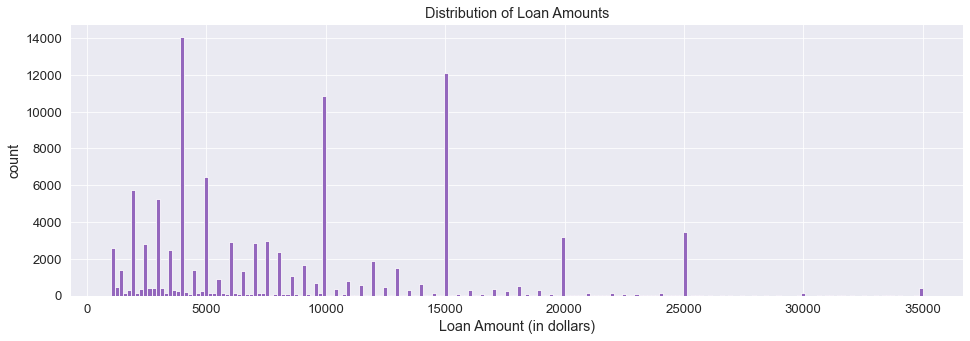

In [8]:
plt.figure(figsize=(16,5))
color=sns.color_palette()[4]

plt.hist(data=loan_df, x="loan_original_amount",color=sns.color_palette()[4],bins=200)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount (in dollars)')
plt.ylabel('count');

# Relationship Between Interest Rate and Annual Percentage Rate (APR)

The presented chart shows a strong positive relationship between the interest rate and the annual percentage rate (APR). It is clear that whatever factor that affect the interest rate will have the same effect on the annual percentage rate.

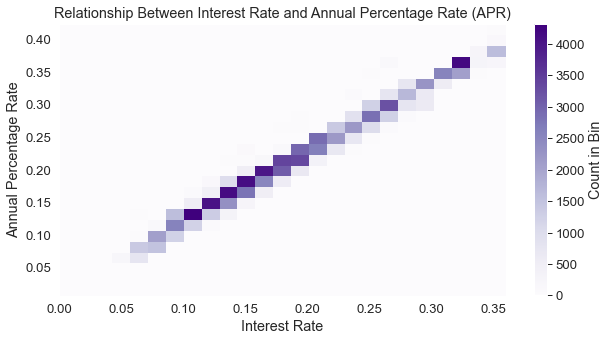

In [9]:
plt.figure(figsize=(10,5))
plt.hist2d(data = loan_df, x = 'borrower_rate', y = 'borrower_apr', cmap='Purples',bins=25)
plt.title('Relationship Between Interest Rate and Annual Percentage Rate (APR)')
plt.colorbar(label='Count in Bin')
plt.xlabel('Interest Rate')
plt.ylabel('Annual Percentage Rate');

# Relationship Between Loan Amount and Monthly Loan Payment

The presented chart shows a strong positive relationship between the original loan amount and the monthly loan payment. It is clear that whatever factor that affect the original loan amount will have the same effect on the monthly loan payment.

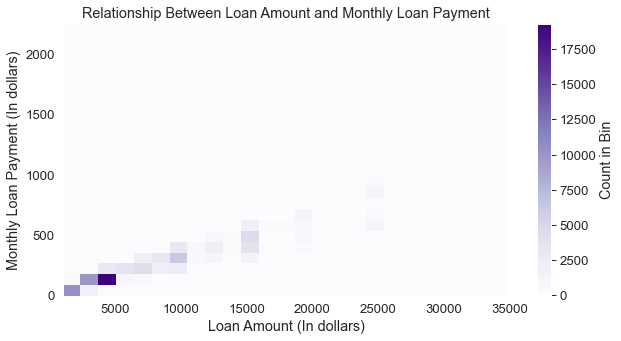

In [10]:
plt.figure(figsize=(10,5))
plt.hist2d(data = loan_df, x = 'loan_original_amount', y = 'monthly_loan_payment', cmap='Purples',bins=25)
plt.title('Relationship Between Loan Amount and Monthly Loan Payment')
plt.colorbar(label='Count in Bin')
plt.xlabel('Loan Amount (In dollars)')
plt.ylabel('Monthly Loan Payment (In dollars)');

# Relationship Between Interest Rate and Loan amount

There is a negative relationship between Interest rates and loan amounts. As the loan amount increases, the interest rates tend to decrease. This can be clearly seen in the following charts.

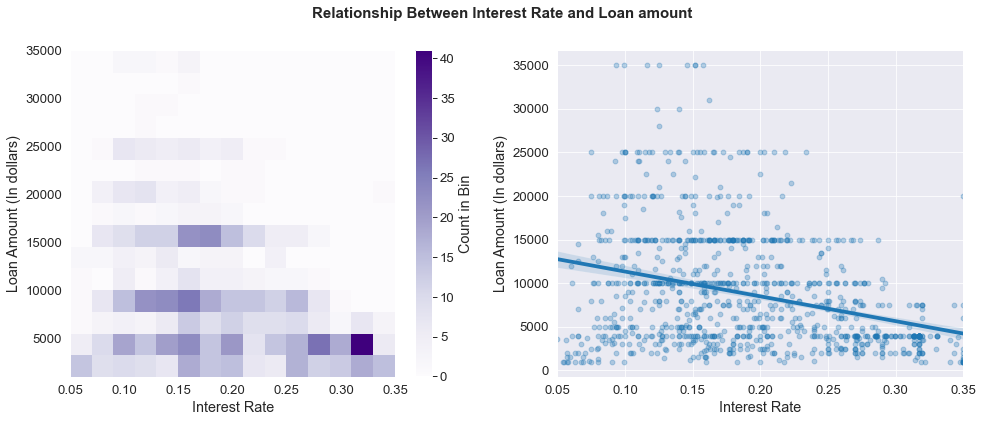

In [11]:
# creating a random sample of 1000 data points for a clearer visualization
samples = np.random.choice(loan_df.shape[0], 1000, replace = False)
loan_sample = loan_df.loc[samples,:]

plt.figure(figsize=(16,6))
plt.suptitle('Relationship Between Interest Rate and Loan amount', fontsize=15, fontweight='bold')

plt.subplot(1,2,1)
plt.hist2d(data = loan_sample, x = 'borrower_rate', y = 'loan_original_amount', cmap='Purples',bins=15)
plt.colorbar(label='Count in Bin')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount (In dollars)')

plt.subplot(1,2,2)
sns.regplot(data = loan_sample, x = 'borrower_rate', y = 'loan_original_amount',scatter_kws={'alpha':0.3})
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount (In dollars)');

# Relationship Between Interest Rate and Loan outcome

The provided boxplot shows us that the median interest rate tends to be higher in the case of non-completed loans. Completed loans have the lowest median interest rate and apr.<br>This is supported by the adapted bar chart, with the average interest rate on the y-axis against the loan status on the x-axis, we can clearly see that on average non-completed loans tend to haver higher interest rate. Completed loans have the lowest average interest rate.

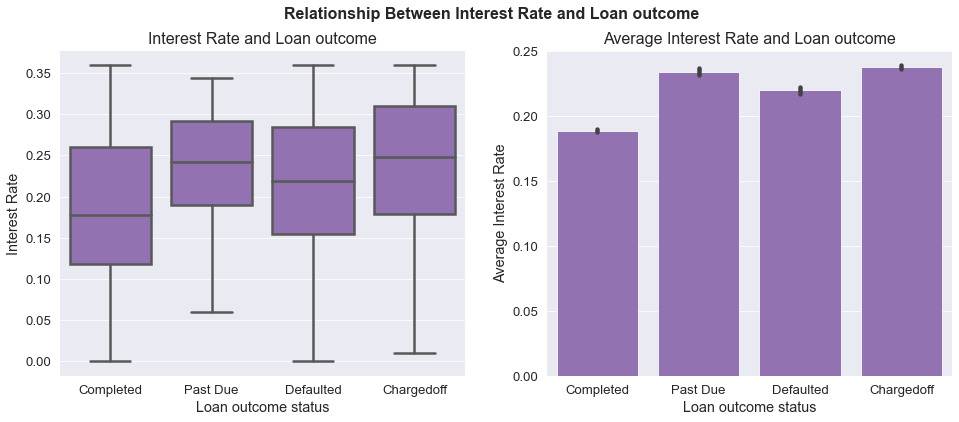

In [12]:
plt.figure(figsize=(16,6))
plt.suptitle('Relationship Between Interest Rate and Loan outcome', fontsize=16, fontweight='bold')

plt.subplot(1,2,1)
plt.title('Interest Rate and Loan outcome', fontsize=16)
sns.boxplot(data=loan_df, x='loan_status', y='borrower_rate', color=sns.color_palette()[4])
plt.xlabel('Loan outcome status')
plt.ylabel('Interest Rate')

plt.subplot(1,2,2)
plt.title('Average Interest Rate and Loan outcome', fontsize=16)
sns.barplot(data=loan_df, x='loan_status', y='borrower_rate', color=sns.color_palette()[4])
plt.xlabel('Loan outcome status')
plt.ylabel('Average Interest Rate');

# Relationship Between Loan amount and Loan outcome

The bulk of the loan original amount data points lie below 10,000 dollars, with non-completed loans having a slightly higher median loan amount than completed loans as seen in the violinplot.<br>The relationship between the original loan amount and loan status is clearer in the adapted bar chart, having the average loan amount on the y-axis against loan outcome status on the x-axis, we can see that on average non-completed loans tend to have larger loan amounts than completed loans.

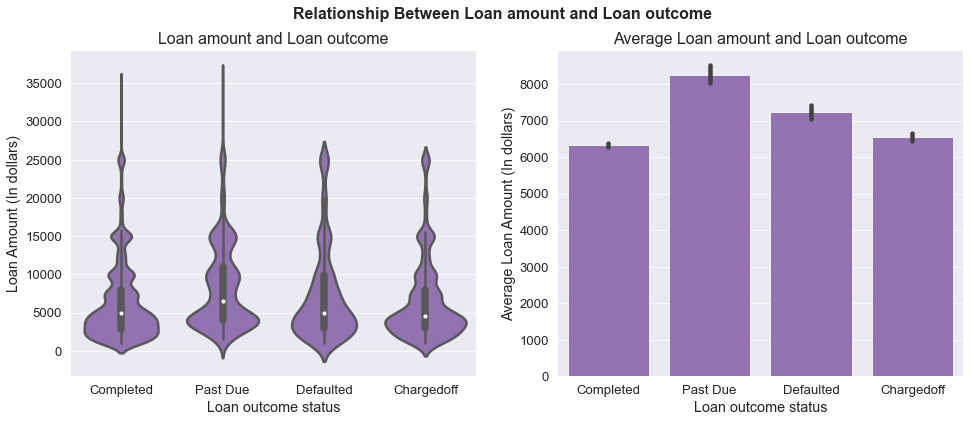

In [13]:
plt.figure(figsize=(16,6))
plt.suptitle('Relationship Between Loan amount and Loan outcome', fontsize=16, fontweight='bold')

plt.subplot(1,2,1)
plt.title('Loan amount and Loan outcome', fontsize=16)
sns.violinplot(data=loan_df, x='loan_status', y='loan_original_amount', color=sns.color_palette()[4])
plt.xlabel('Loan outcome status')
plt.ylabel('Loan Amount (In dollars)')

plt.subplot(1,2,2)
plt.title('Average Loan amount and Loan outcome', fontsize=16)
sns.barplot(data=loan_df, x='loan_status', y='loan_original_amount', color=sns.color_palette()[4])
plt.xlabel('Loan outcome status')
plt.ylabel('Average Loan Amount (In dollars)');

# Relationship between Interest Rate and Prosper Rating

We can see from the pointplot that interest rates show steady increase as we move to higher risk ratings. Higher interest rates are associated with higher risk ratings.<br>The adapted bar chart also tells the same story. Having the average interest rate plotted on the y-axis against prosper ratings on the x-axis, we can say that on average as the interest rate gets higher, the more likely it is to get a higher risk rating.

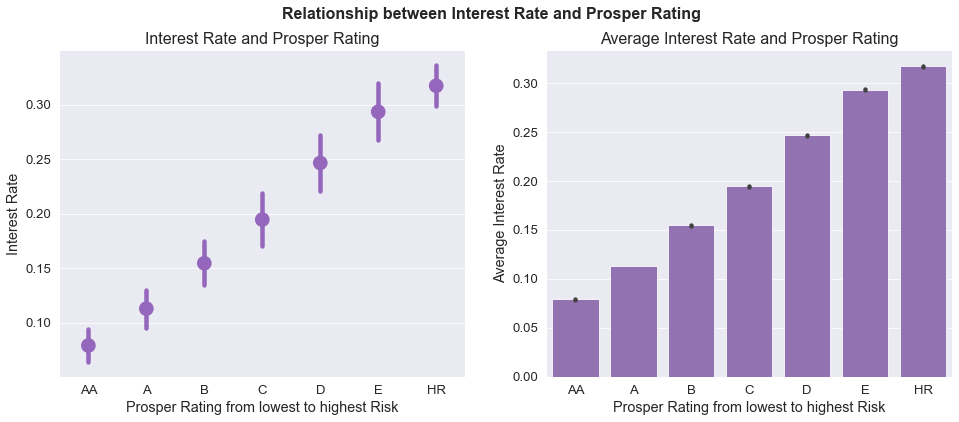

In [14]:
plt.figure(figsize=(16,6))
plt.suptitle('Relationship between Interest Rate and Prosper Rating', fontsize=16, fontweight='bold')
color = sns.color_palette()[4]

plt.subplot(1,2,1)
plt.title('Interest Rate and Prosper Rating', fontsize=16)
sns.pointplot(data=loan_df, x='prosper_rating', y='borrower_rate', color=color, ci='sd', linestyles="")
plt.xlabel('Prosper Rating from lowest to highest Risk')
plt.ylabel('Interest Rate')

plt.subplot(1,2,2)
plt.title('Average Interest Rate and Prosper Rating', fontsize=16)
sns.barplot(data=loan_df, x='prosper_rating', y='borrower_rate', color=color)
plt.xlabel('Prosper Rating from lowest to highest Risk')
plt.ylabel('Average Interest Rate');

# Combining our selected features together

We have now looked at our variables individually to see how they look like. We have explored the relationships between each two variables to see how they could affect each other separately will everything else remains constant. Now we are going to have a look at the relationships between our main features to see how they will interact.

# Interest Rate and Loan Amount Across Loan outcomes and Prosper Ratings

- We can see that **higher interest rates** and **lower loan amounts** are associated with **non-completed loans**. This is clear from the concentration of the dark red points at the right lower quadrant.


- We can also see that **higher interest rates** and **lower loan amounts** are associated with **Higher-risk ratings**. This is clear from the concentration of the dark orange points at the right lower quadrant.


- Both **Higher-risk ratings** and **non-completed loans** are associated with **higher interest rates** and **lower loan amounts** which may indicate that Prosper ratings are a good estimate for loan outcome.

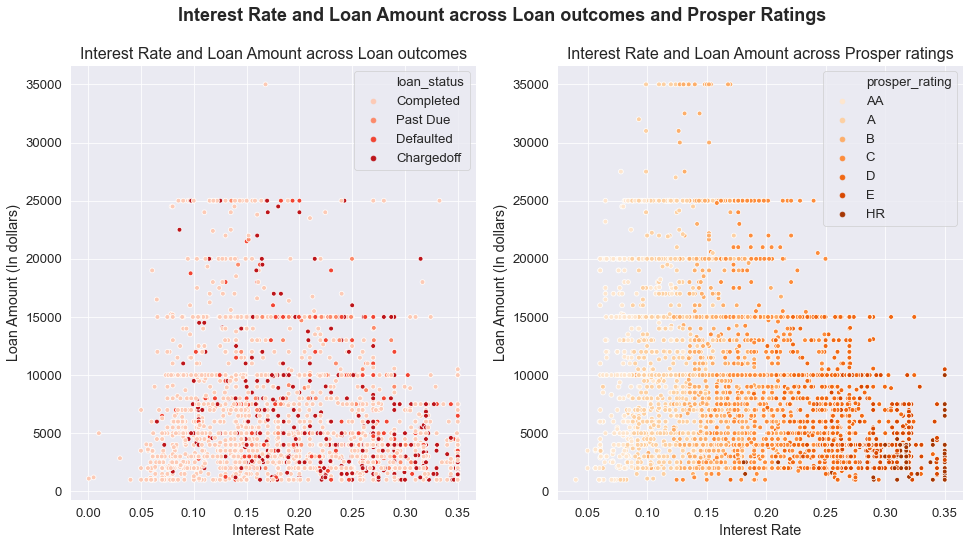

In [15]:
# creating random sample of 5000 data points
samples = np.random.choice(loan_df.shape[0], 5000, replace = False)
loan_sample = loan_df.loc[samples,:]

plt.figure(figsize=(16,8))
plt.suptitle('Interest Rate and Loan Amount across Loan outcomes and Prosper Ratings', fontsize=18, fontweight='bold')

plt.subplot(1,2,1)
plt.title('Interest Rate and Loan Amount across Loan outcomes', fontsize=16)
sns.scatterplot(data=loan_sample, x='borrower_rate', y='loan_original_amount',
                hue='loan_status',hue_order=['Completed','Past Due','Defaulted','Chargedoff'], palette='Reds')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount (In dollars)')

plt.subplot(1,2,2)
plt.title('Interest Rate and Loan Amount across Prosper ratings', fontsize=16)
sns.scatterplot(data=loan_sample, x='borrower_rate', y='loan_original_amount',
                hue='prosper_rating', hue_order=['AA','A','B','C','D','E','HR'], palette='Oranges')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount (In dollars)');